## Rodando modelo 1

código de <https://towardsdatascience.com/an-introduction-to-bayesian-inference-in-pystan-c27078e58d53>

In [1]:
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()  # Nice plot aesthetic
np.random.seed(101)

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x, sigma);
}
"""

In [2]:
# Parameters to be inferred
alpha = 4.0
beta = 0.5
sigma = 1.0

# Generate and plot data
x = 10 * np.random.rand(100)
y = alpha + beta * x
y = np.random.normal(y, scale=sigma)

alpha = 4.0
beta = 0.5
sigma = 1.0


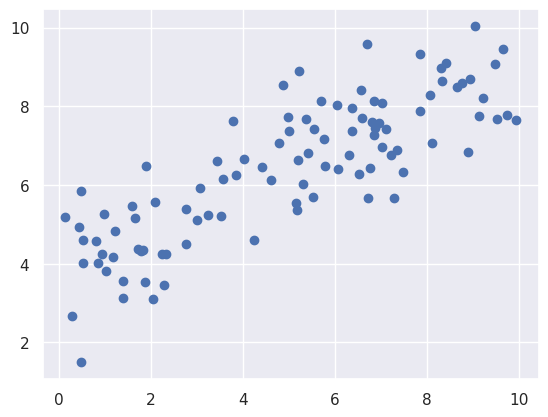

In [3]:
plt.scatter(x,y)
print(f"alpha = {alpha}\nbeta = {beta}\nsigma = {sigma}")

In [4]:
# pra fazer os negócios funcionar
import nest_asyncio
nest_asyncio.apply()

# pra sumir com os warnings
import warnings
warnings.filterwarnings('ignore')  # não deu certo :(

In [5]:
# Put our data in a dictionary
data = {'N': len(x), 'x': x, 'y': y}


# Compile the model
sm = stan.build(model, data=data, random_seed=1)

# Train the model and generate samples
posterior = stan.build(model, data=data, random_seed=1)
fit = posterior.sample(num_chains=4, num_samples=1000)
fit #["eta"]  # array with shape (8, 4000)


Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.5e-05 seconds
  100

<stan.Fit>
Parameters:
    alpha: ()
    beta: ()
    sigma: ()
Draws: 4000

In [6]:
alpha = fit['alpha'].reshape(4000,)
beta = fit['beta'].reshape(4000,)
sigma = fit['sigma'].reshape(4000,)

In [9]:
fit['alpha']

array([[4.116239  , 3.9346961 , 4.05922276, ..., 3.48342703, 3.74906799,
        3.80896964]])

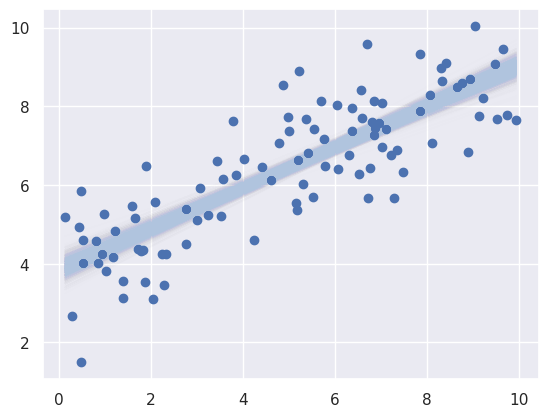

In [8]:
x_plot = np.linspace(x.min(), x.max(), 100)
plt.scatter(x,y)
for i in np.random.randint(0, len(alpha), 1000):
  plt.plot(x_plot, alpha[i] + beta[i] * x_plot, color='lightsteelblue', 
           alpha=0.005)

(array([  0.,   1.,   0.,   1.,   1.,   2.,   3.,   1.,   3.,   9.,  10.,
         12.,  17.,  17.,  36.,  35.,  64.,  65.,  70., 105., 107., 148.,
        160., 189., 192., 210., 209., 236., 228., 229., 219., 208., 196.,
        181., 148., 147., 126.,  95.,  91.,  57.,  55.,  34.,  21.,  21.,
          9.,  11.,  11.,   4.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([3.  , 3.03, 3.06, 3.09, 3.12, 3.15, 3.18, 3.21, 3.24, 3.27, 3.3 ,
        3.33, 3.36, 3.39, 3.42, 3.45, 3.48, 3.51, 3.54, 3.57, 3.6 , 3.63,
        3.66, 3.69, 3.72, 3.75, 3.78, 3.81, 3.84, 3.87, 3.9 , 3.93, 3.96,
        3.99, 4.02, 4.05, 4.08, 4.11, 4.14, 4.17, 4.2 , 4.23, 4.26, 4.29,
        4.32, 4.35, 4.38, 4.41, 4.44, 4.47, 4.5 , 4.53, 4.56, 4.59, 4.62,
        4.65, 4.68, 4.71, 4.74, 4.77, 4.8 , 4.83, 4.86, 4.89, 4.92, 4.95,
        4.98]),
 <BarContainer object of 66 artists>)

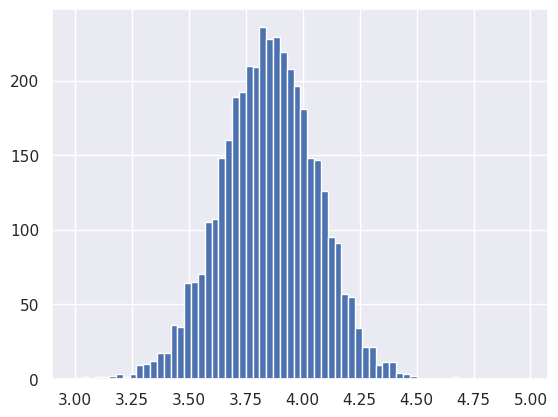

In [15]:
bins = np.arange(3,5,.03)
plt.hist(alpha, bins = bins)

In [16]:
def plot_trace(param, param_name='parameter'):
  """Plot the trace and posterior of a parameter."""
  
  # Summary statistics
  mean = np.mean(param)
  median = np.median(param)
  cred_min, cred_max = np.percentile(param, 2.5), np.percentile(param, 97.5)
  
  # Plotting
  plt.subplot(2,1,1)
  plt.plot(param)
  plt.xlabel('samples')
  plt.ylabel(param_name)
  plt.axhline(mean, color='r', lw=2, linestyle='--')
  plt.axhline(median, color='c', lw=2, linestyle='--')
  plt.axhline(cred_min, linestyle=':', color='k', alpha=0.2)
  plt.axhline(cred_max, linestyle=':', color='k', alpha=0.2)
  plt.title('Trace and Posterior Distribution for {}'.format(param_name))

  plt.subplot(2,1,2)
  plt.hist(param, 30, density=True); sns.kdeplot(param, shade=True)
  plt.xlabel(param_name)
  plt.ylabel('density')
  plt.axvline(mean, color='r', lw=2, linestyle='--',label='mean')
  plt.axvline(median, color='c', lw=2, linestyle='--',label='median')
  plt.axvline(cred_min, linestyle=':', color='k', alpha=0.2, label='95% CI')
  plt.axvline(cred_max, linestyle=':', color='k', alpha=0.2)
  
  plt.gcf().tight_layout()
  plt.legend()

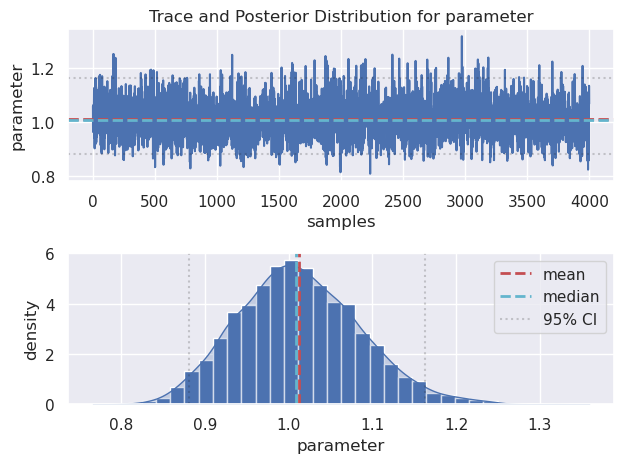

In [20]:
plot_trace(sigma)